In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#to suppress any warnings - for presentation purposes
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


from pylab import rcParams


sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8



**Dataset and Description**

In [2]:
#Loading the data

data=pd.read_csv('car data.csv')

In [3]:
data.head()

,name,Year,Present_price,Mileage,Fuel,Seller_type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
#Describing the structure of the car dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Present_price  4340 non-null   int64 
 3   Mileage        4340 non-null   int64 
 4   Fuel           4340 non-null   object
 5   Seller_type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
#Descripptive Analysis
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
Present_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
Mileage,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


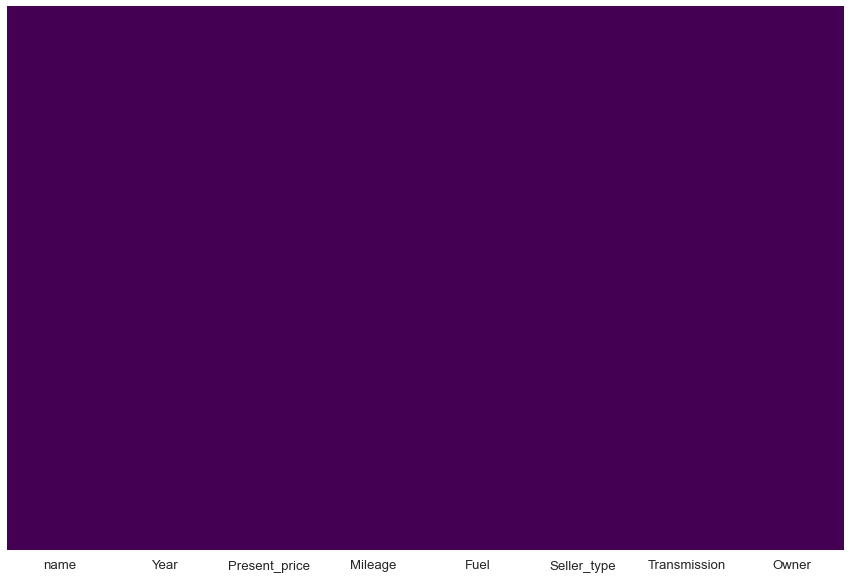

In [6]:
'''This step includes removing columns we do not need,
check missing values, aggregate sales by date and so on.
creating a heatmap to look for missing data'''
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis');

In [7]:
print('Assessing missing values in the data dataset')

#total represents the sum of all the missing values for each column, sorted by descending order
total=data.isnull().sum().sort_values(ascending=False)


#percent = sum of all the missing value in each of the columns (divided by) the number of all the missing values in t
#he dataset
percent=100*(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

#Display our result in a tabular form
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
print(missing_data)


Assessing missing values in the data dataset
               Total  Percent
Owner              0      0.0
Transmission       0      0.0
Seller_type        0      0.0
Fuel               0      0.0
Mileage            0      0.0
Present_price      0      0.0
Year               0      0.0
name               0      0.0


In [8]:
print (data['Owner'].unique())
print (data['Transmission'].unique())
print (data['Seller_type'].unique())
print (data['Fuel'].unique())

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Manual' 'Automatic']
['Individual' 'Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


# EXPLORATORY DATA ANALYSIS

**Present price vs Fuel Type:**

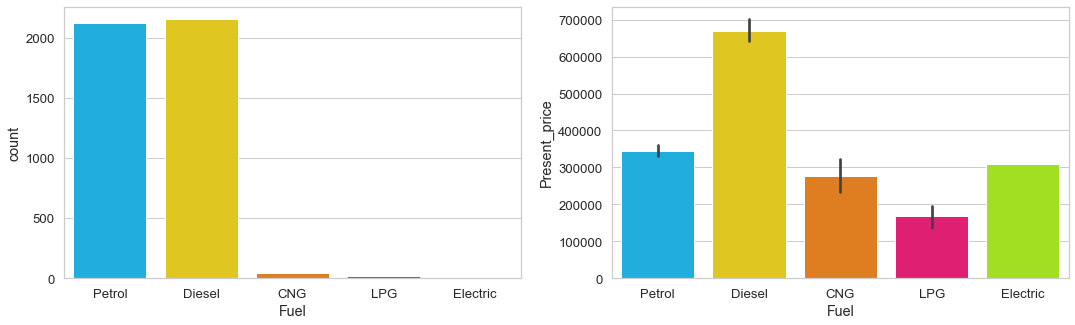

In [9]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'Fuel', data = data, ax = axis1)
sns.barplot(x = 'Fuel', y = 'Present_price', data = data, ax = axis2);

**Observation:**

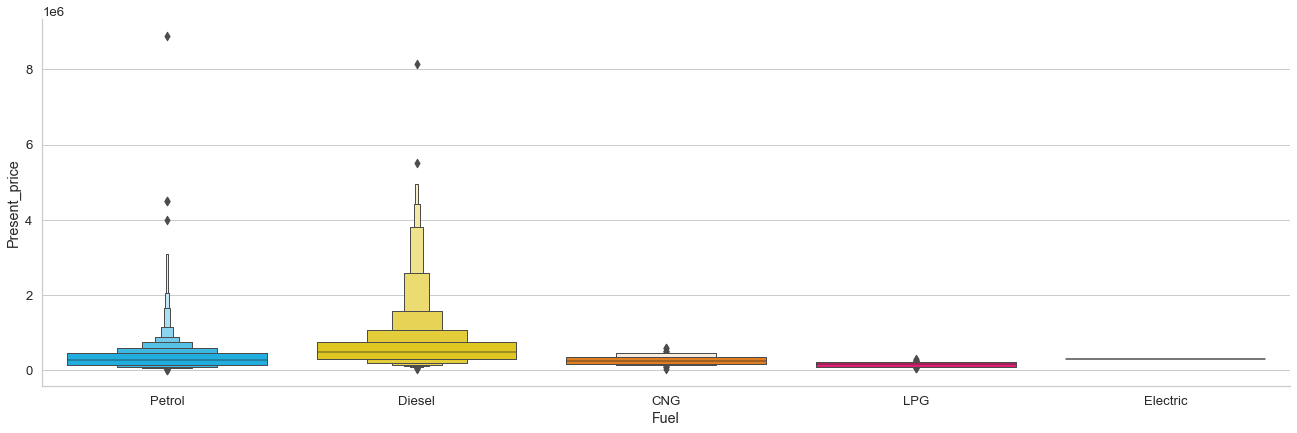

In [10]:
sns.catplot(y='Present_price', x='Fuel', data=data.sort_values('Present_price', ascending=True),
            kind='boxen', height=6, aspect=3);

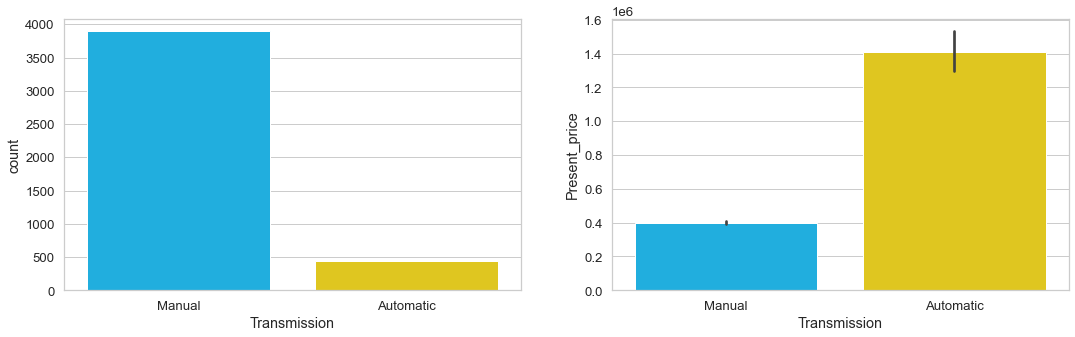

In [11]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'Transmission', data = data, ax = axis1)
sns.barplot(x = 'Transmission', y = 'Present_price', data = data, ax = axis2);

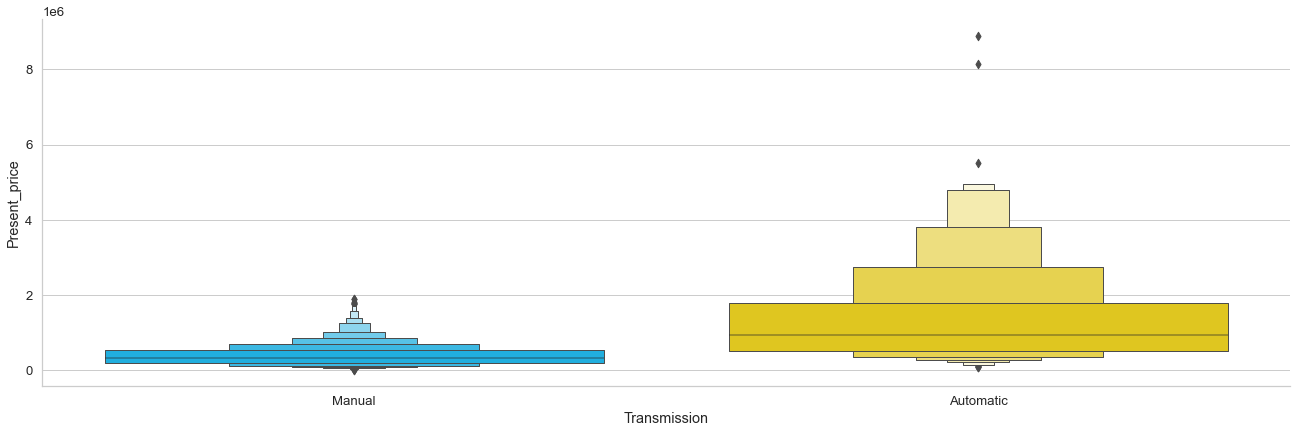

In [12]:
sns.catplot(y='Present_price', x='Transmission', data=data.sort_values('Present_price', ascending=True),
            kind='boxen', height=6, aspect=3);

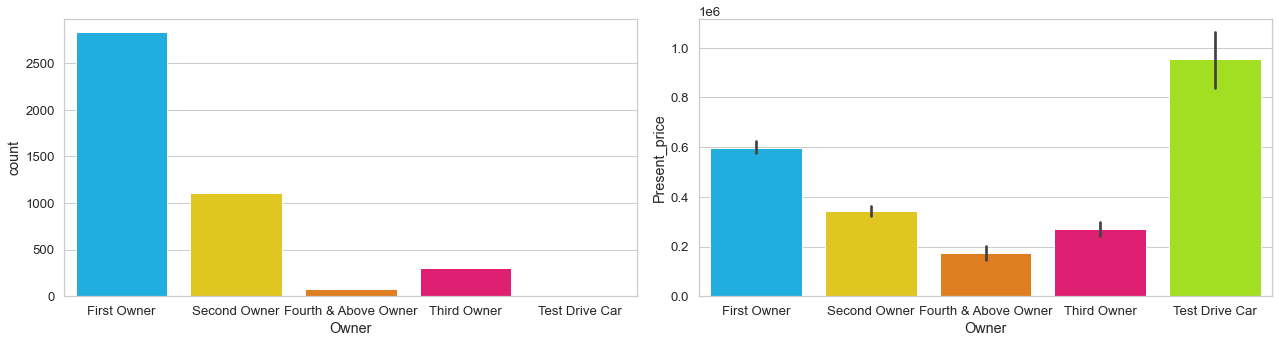

In [13]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'Owner', data = data, ax = axis1)
sns.barplot(x = 'Owner', y = 'Present_price', data = data, ax = axis2)
plt.tight_layout();

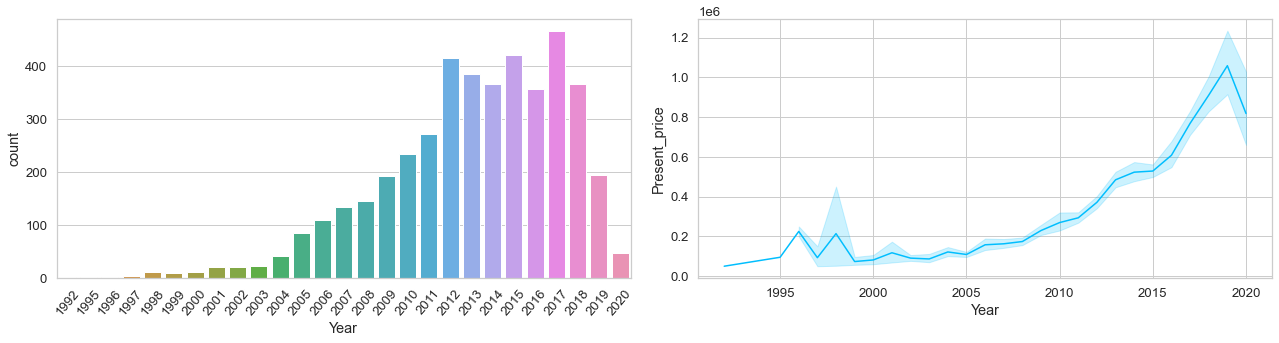

In [14]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
axis1.set_xticklabels(axis1.get_xticklabels(),rotation=50)
sns.countplot(x = 'Year', data = data, ax = axis1)
sns.lineplot(x = 'Year', y = 'Present_price', data = data, ax = axis2)
plt.tight_layout();

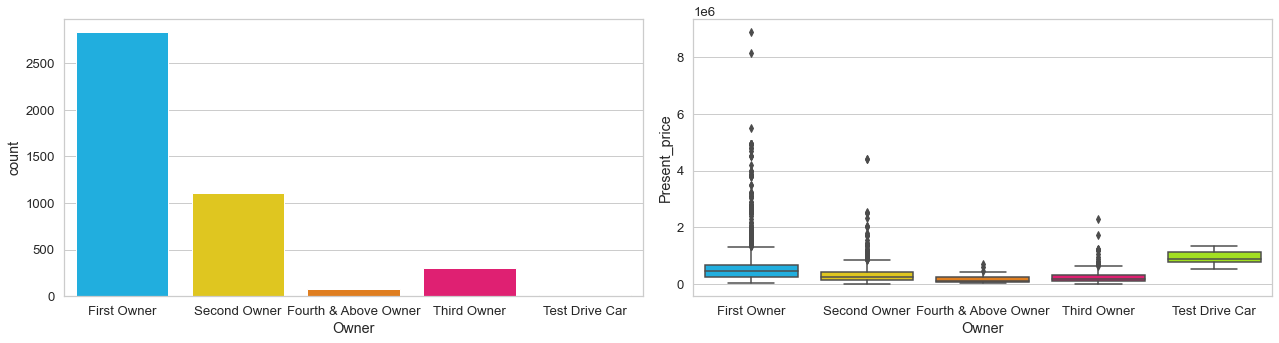

In [15]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'Owner', data = data, ax = axis1)
sns.boxplot(x = 'Owner', y = 'Present_price', data = data, ax = axis2)
plt.tight_layout();

In [16]:
# convert the values of 'owner' column to numerical format
z = lambda x: 0 if x == 'First Owner' else (1 if x == 'Second Owner' else (2 if x == 'Third Owner' else 3))
data['Owner'] = data['Owner'].apply(z)

In [17]:
data.head()

,name,Year,Present_price,Mileage,Fuel,Seller_type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,1


In [18]:
data.columns

Index(['name', 'Year', 'Present_price', 'Mileage', 'Fuel', 'Seller_type',
       'Transmission', 'Owner'],
      dtype='object')

In [19]:
final_data=data[['Year', 'Present_price', 'Mileage', 'Fuel', 'Seller_type',
       'Transmission', 'Owner']]

In [20]:
final_data.head()

,Year,Present_price,Mileage,Fuel,Seller_type,Transmission,Owner
0,2007,60000,70000,Petrol,Individual,Manual,0
1,2007,135000,50000,Petrol,Individual,Manual,0
2,2012,600000,100000,Diesel,Individual,Manual,0
3,2017,250000,46000,Petrol,Individual,Manual,0
4,2014,450000,141000,Diesel,Individual,Manual,1


In [21]:
final_data['Current Year']=2020


In [22]:
final_data.head()

,Year,Present_price,Mileage,Fuel,Seller_type,Transmission,Owner,Current Year
0,2007,60000,70000,Petrol,Individual,Manual,0,2020
1,2007,135000,50000,Petrol,Individual,Manual,0,2020
2,2012,600000,100000,Diesel,Individual,Manual,0,2020
3,2017,250000,46000,Petrol,Individual,Manual,0,2020
4,2014,450000,141000,Diesel,Individual,Manual,1,2020


In [23]:
final_data['no_year']=final_data['Current Year']- final_data['Year']


In [24]:
final_data.head()

,Year,Present_price,Mileage,Fuel,Seller_type,Transmission,Owner,Current Year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,0,2020,13
1,2007,135000,50000,Petrol,Individual,Manual,0,2020,13
2,2012,600000,100000,Diesel,Individual,Manual,0,2020,8
3,2017,250000,46000,Petrol,Individual,Manual,0,2020,3
4,2014,450000,141000,Diesel,Individual,Manual,1,2020,6


In [25]:
final_data.drop(['Year'],axis=1,inplace=True)


In [26]:
final_data.drop(['Current Year'],axis=1,inplace=True)

In [27]:
final_data.head()

,Present_price,Mileage,Fuel,Seller_type,Transmission,Owner,no_year
0,60000,70000,Petrol,Individual,Manual,0,13
1,135000,50000,Petrol,Individual,Manual,0,13
2,600000,100000,Diesel,Individual,Manual,0,8
3,250000,46000,Petrol,Individual,Manual,0,3
4,450000,141000,Diesel,Individual,Manual,1,6


In [28]:
final_data=pd.get_dummies(final_data,drop_first=True)


In [29]:
final_data.head()

,Present_price,Mileage,Owner,no_year,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_type_Individual,Transmission_Manual
0,60000,70000,0,13,0,0,0,1,1,1
1,135000,50000,0,13,0,0,0,1,1,1
2,600000,100000,0,8,1,0,0,0,1,1
3,250000,46000,0,3,0,0,0,1,1,1
4,450000,141000,1,6,1,0,0,0,1,1


In [30]:
final_data.corr()

,Present_price,Mileage,Owner,no_year,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_type_Individual,Transmission_Manual
Present_price,1.000000,-0.192289,-0.207503,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,-0.530205
Mileage,-0.192289,1.000000,0.287763,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,0.120226
Owner,-0.207503,0.287763,1.000000,0.427919,-0.005814,0.011267,0.027871,-0.003982,0.224213,0.085016
no_year,-0.413922,0.419688,0.427919,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,0.143800
Fuel_Diesel,0.282947,0.285396,-0.005814,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.048098
Fuel_Electric,-0.005095,-0.001372,0.011267,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.044746
Fuel_LPG,-0.042434,0.036652,0.027871,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,0.024764
Fuel_Petrol,-0.269453,-0.291139,-0.003982,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.039614
Seller_type_Individual,-0.236798,0.182663,0.224213,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,0.214163
Transmission_Manual,-0.530205,0.120226,0.085016,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,1.000000


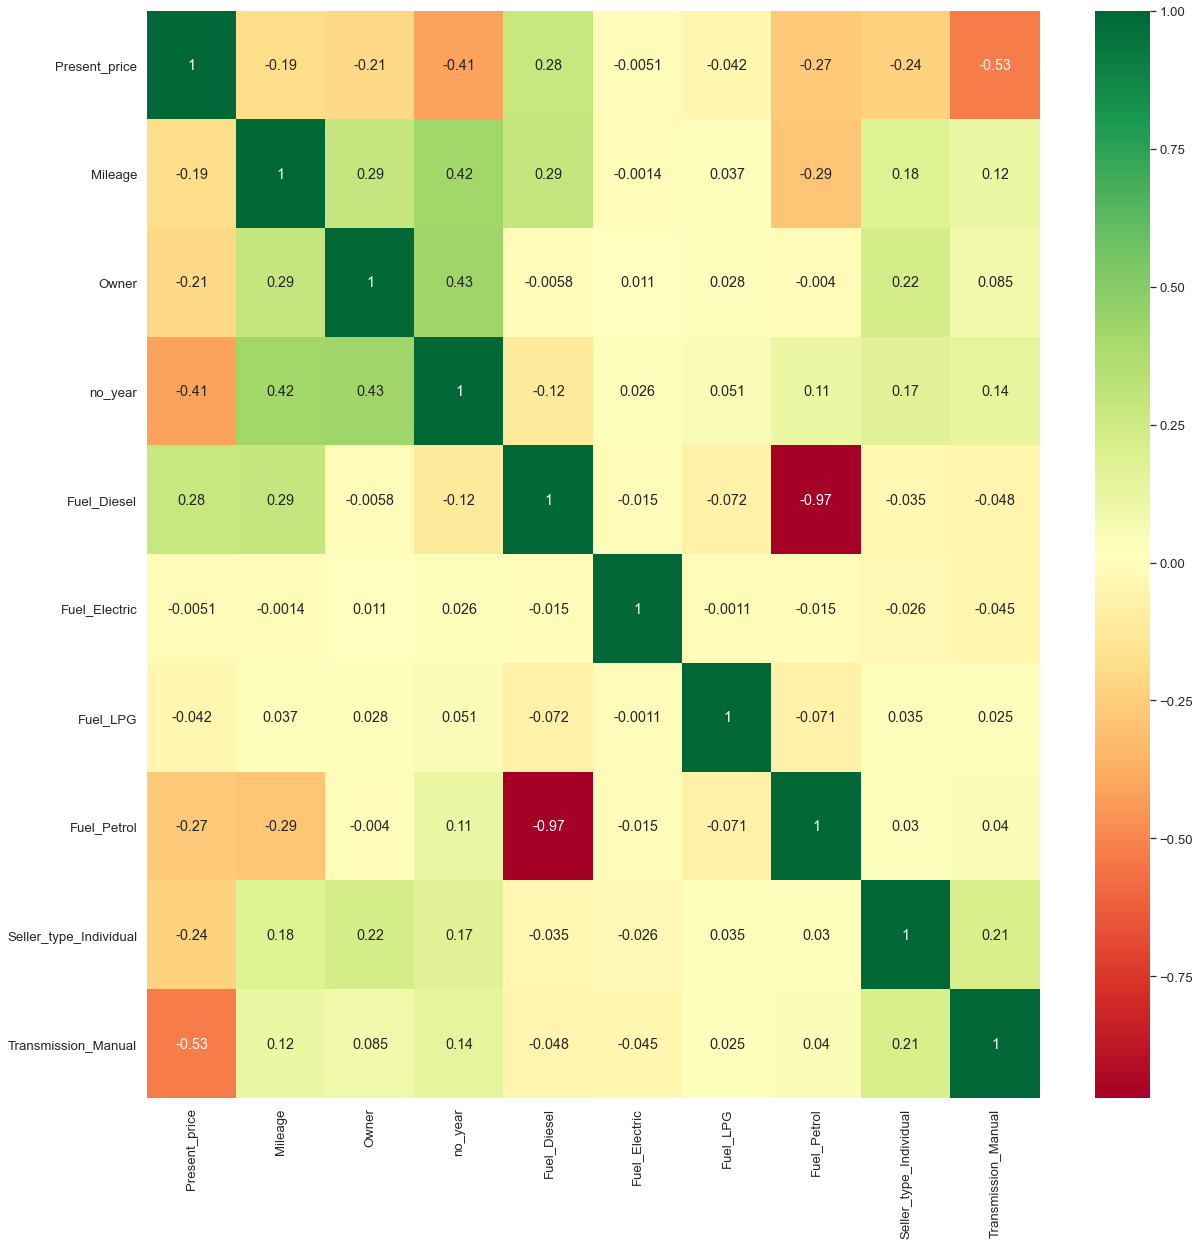

In [31]:
#get correlations of each features in dataset
corrmat = final_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [32]:
final_data.columns

Index(['Present_price', 'Mileage', 'Owner', 'no_year', 'Fuel_Diesel',
       'Fuel_Electric', 'Fuel_LPG', 'Fuel_Petrol', 'Seller_type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [33]:
X=final_data.iloc[:,1:]
y=final_data.iloc[:,0]


In [34]:
X.head()

,Mileage,Owner,no_year,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_type_Individual,Transmission_Manual
0,70000,0,13,0,0,0,1,1,1
1,50000,0,13,0,0,0,1,1,1
2,100000,0,8,1,0,0,0,1,1
3,46000,0,3,0,0,0,1,1,1
4,141000,1,6,1,0,0,0,1,1


In [35]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: Present_price, dtype: int64

In [36]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [37]:
print(model.feature_importances_)

[2.54611666e-01 2.76671496e-02 2.50045859e-01 1.30809034e-01
 3.67177284e-05 2.45724434e-05 2.05867294e-04 4.37614275e-02
 2.92837706e-01]


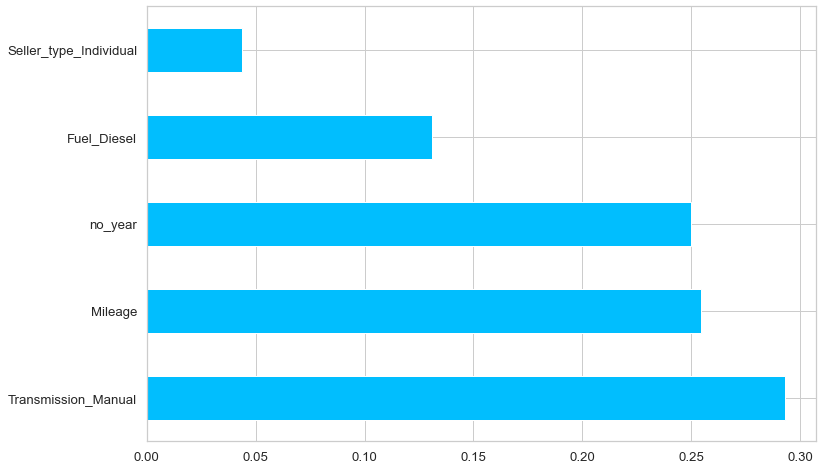

In [38]:
#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


**Tuning our hyperparameters with Random Forest Regressor**

Note:- With randomforest (RF) we do not have to scale the data because RF is a form of decision tree (which does not need us to scale the data also)

In [41]:
#Importing RandomForestRegressor from the sklearn.ensemble library

from sklearn.ensemble import RandomForestRegressor

In [42]:
rf_regressor=RandomForestRegressor()

In [43]:
#The number of decision trees that we want in our random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [44]:
from sklearn.model_selection import RandomizedSearchCV


In [45]:
#Randomized Search CV
#Will help us find the best parameters
#=====================================

#Note:-Grid Search CV can be used but Randomized Search CV is faster

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [46]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'min_samples_split': min_samples_split,
 'min_samples_leaf': min_samples_leaf}
print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_regressor=RandomForestRegressor()

In [48]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_regressor, param_distributions = random_grid,n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)


In [49]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [50]:
rf_random.best_params_


{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [51]:
rf_random.best_score_


0.6355353740851253

In [52]:
y_predictions=rf_random.predict(X_test)

In [53]:
y_predictions

array([1045937.41446405, 1496000.11822656,  230278.29211525, ...,
        136532.50264273,  351802.67683954,  291131.78840204])

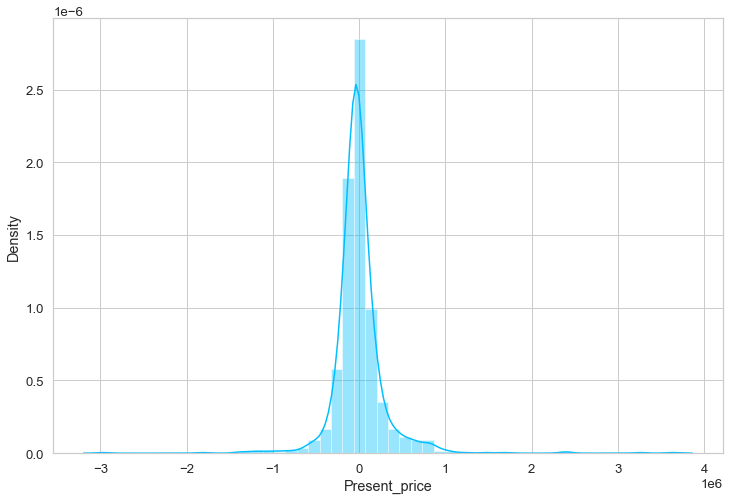

In [54]:
sns.distplot(y_test-y_predictions);


**Observation**
we can see that our graph looks like a normal distribution and very narrow shaped. This implies that our model is giving us very good results

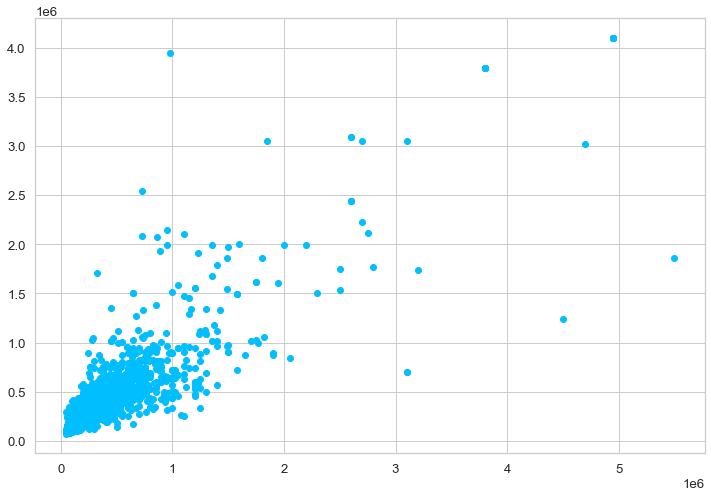

In [55]:
plt.scatter(y_test,y_predictions);

In [56]:
# import the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_absolute_error

In [57]:
def plotPred(y_pred):
    x_points=np.linspace(0,7e6)
    plt.figure(figsize=(12,5))
    plt.plot(x_points, x_points, color='r')
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values Vs Predicted Values');

In [58]:
linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)

LinearRegression()

In [59]:
# train and test scores
lr_train_score = round(linear_regr.score(X_train, y_train), 2)
lr_test_score = round(linear_regr.score(X_test, y_test), 2)
# predicted output
y_pred_linear_reg = linear_regr.predict(X_test)

In [60]:

print('Linear Regression train score: ', lr_train_score)
print('Linear Regression test score: ', lr_test_score)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_linear_reg))
print('Coefficient of determination: ', r2_score(y_test, y_pred_linear_reg))

Linear Regression train score:  0.44
Linear Regression test score:  0.48
Mean absolute error:  233565.43924982465
Coefficient of determination:  0.4833452936074959


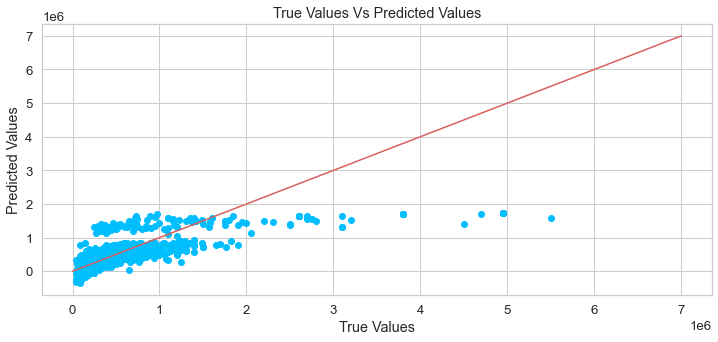

In [61]:
#plotting the graph

# plot predicted vs true values
plotPred( y_pred_linear_reg)

**Decision Tree**

In [62]:
Decison_Tree_regr = DecisionTreeRegressor()

Decison_Tree_regr.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
# train and test scores
Decison_Tree_train_score = round(Decison_Tree_regr.score(X_train, y_train), 2)
Decison_Tree_test_score = round(Decison_Tree_regr.score(X_test, y_test), 2)

In [64]:
# predicted output
y_pred_Decision_Tree = Decison_Tree_regr.predict(X_test)

In [65]:
print('Decision Tree Regressor train score: ', Decison_Tree_train_score)
print('Decision Tree Regressor test score: ', Decison_Tree_test_score )
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_Decision_Tree))
print('Coefficient of determination: ', r2_score(y_test, y_pred_Decision_Tree))

Decision Tree Regressor train score:  0.97
Decision Tree Regressor test score:  0.34
Mean absolute error:  185279.57063716496
Coefficient of determination:  0.3408345253234759


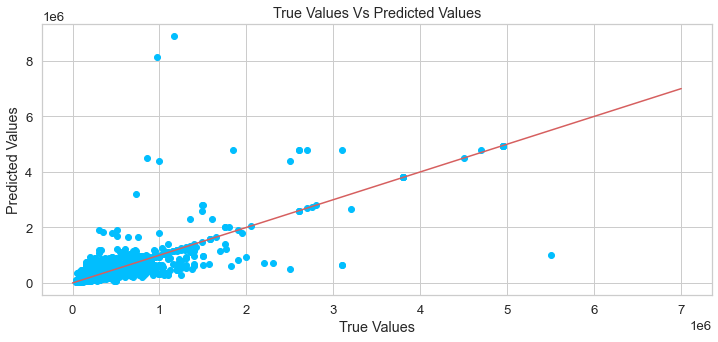

In [66]:
#plotting the graph

# plot predicted vs true values
plotPred( y_pred_Decision_Tree)

In [67]:
Random_Forest_reg = RandomForestRegressor()
Random_Forest_reg.fit(X_train, y_train)


RandomForestRegressor()

In [68]:
# train and test scores
Random_Forest_train_score = round(Random_Forest_reg.score(X_train, y_train), 2)
Random_Forest_test_score = round(Random_Forest_reg.score(X_test, y_test), 2)
# predicted output
y_pred_Random_Forest = Random_Forest_reg.predict(X_test)

In [69]:
print('Random Forest Regressor train score: ', Random_Forest_train_score)
print('Random Forest Tree Regressor test score: ', Random_Forest_test_score )
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_Random_Forest))
print('Coefficient of determination: ', r2_score(y_test, y_pred_Random_Forest))

Random Forest Regressor train score:  0.92
Random Forest Tree Regressor test score:  0.63
Mean absolute error:  169245.5014825237
Coefficient of determination:  0.6271201343355284


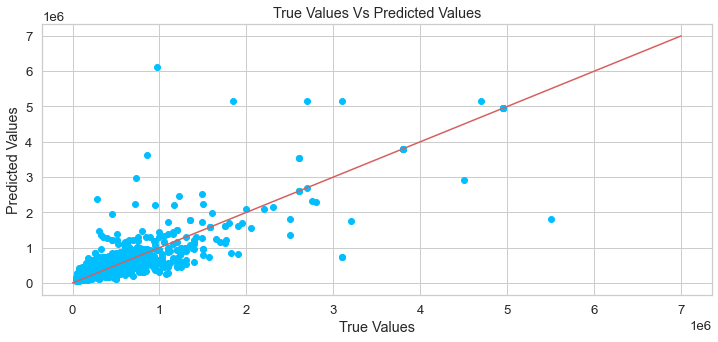

In [70]:
# plot predicted vs true values
plotPred(y_pred_Random_Forest)

In [71]:
import pickle
#open a file, where we want to store the data
file=open("rdm_frst_regr_model.pkl","wb")
pickle.dump(rf_random,file)
file.close()
